In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import re
from imblearn.over_sampling import RandomOverSampler  # Import RandomOverSampler
import langid  # Import langid for language detection

# Load the dataset
data = pd.read_csv('C:/SufiyanProjects/archive/Language Detection.csv')

# Check for any null values and drop them
data.dropna(inplace=True)

# Split data into features and labels
X = data['Text']
y = data['Language']

# Vectorize the text data
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Apply random oversampling to balance the dataset
oversample = RandomOverSampler()
X_resampled, y_resampled = oversample.fit_resample(X_tfidf, y)  # Balance the dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save the model and vectorizer
with open('language_detection_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer_lang.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


Model Accuracy: 99.07%


In [14]:
hindi_data = data[data['Language'] == 'Hindi']
print(hindi_data['Text'].head(2))
Tamil_data = data[data['Language'] == 'Tamil']
print(Tamil_data['Text'].head(2))
Malayalam_data = data[data['Language'] == 'Malayam']
print(Malayalam_data['Text'].head(2))
Kannada_data = data[data['Language'] == 'Kannada']
print(Kannada_data['Text'].head(2))
Greek_data = data[data['Language'] == 'Greek']
print(Greek_data['Text'].head(2))
Russian_data = data[data['Language'] == 'Russian']
print(Russian_data['Text'].head(2))
Arabic_data = data[data['Language'] == 'Arabic']
print(Arabic_data['Text'].head(2))

1979    विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर को...
1980    [42] अंत में, विकिपीडिया एक पक्ष नहीं लेता है।...
Name: Text, dtype: object
2042    விக்கிப்பீடியா (Wikipedia; /ˌwɪkɪˈpiːdiə/ (கேட...
2043    தமிழ் விக்கிப்பீடியாவின் 1,00,000க்கும் மேற்பட...
Name: Text, dtype: object
Series([], Name: Text, dtype: object)
9968    .ನಾವೆಲ್ಲರೂ ಇಂಗ್ಲಿಷ್ನಲ್ಲಿ ಹೆಚ್ಚು ನಿರರ್ಗಳವಾಗಲು ತ...
9969    ಆದ್ದರಿಂದ ಇಂದು ನಾವು 10 ಹೊಸ ಸ್ಮಾರ್ಟ್ ಪದಗಳನ್ನು ಅವ...
Name: Text, dtype: object
5629    Δεν υπάρχει αυτή τη στιγμή  λήμμα με αυτόν τον...
5630    Αν περιμένατε να βρίσκεται εδώ μια σελίδα και ...
Name: Text, dtype: object
5994                           Nature (в переводе с англ.
5995    — «Природа») — один из самых старых и авторите...
Name: Text, dtype: object
8962    نيتشر (بالإنجليزية: Nature)‏ قد تعني:    تعديل...
8963    ويكيبيديا هي موسوعة يمكن لأي مستخدم تعديل وتحر...
Name: Text, dtype: object


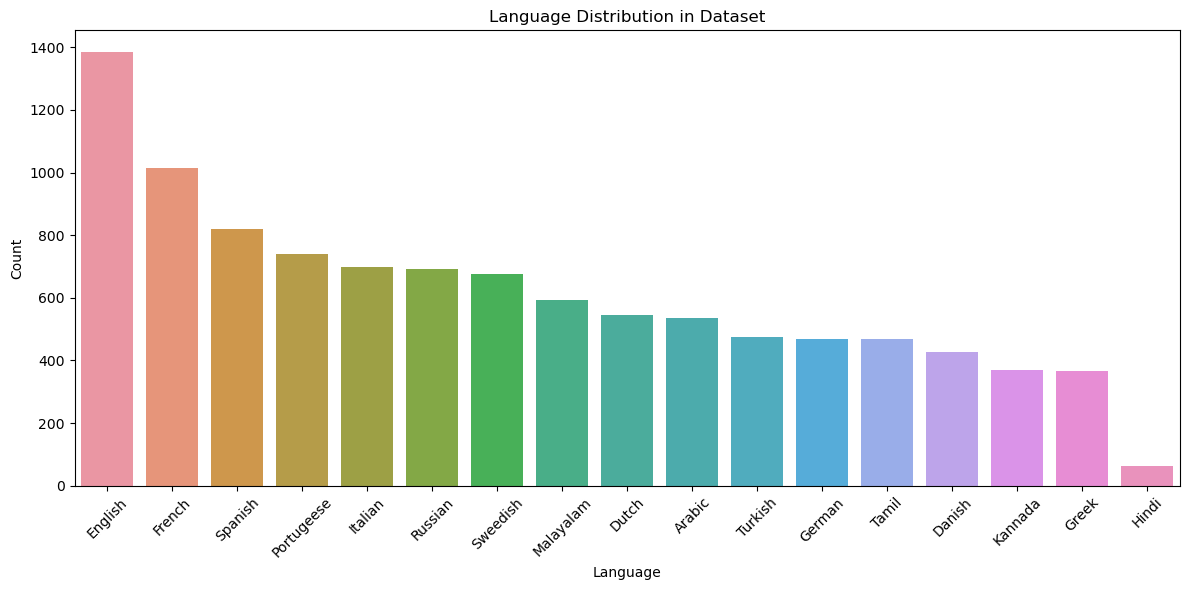

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Analyze language distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Language', order=data['Language'].value_counts().index)
plt.title('Language Distribution in Dataset')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()